In [1]:
import numpy
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
import warnings
import shutil
import xarray
from datetime import date
warnings.filterwarnings('ignore')
import pycountry
sys.path.append(os.getcwd()+'/../../cds-backend/code/')
import cds_eua3 as eua
# import numbaprocess
import copy
import glob
from numba import njit
import pandas
import glob
import pickle
import matplotlib
import matplotlib.pyplot as plt
import h5py as h5

In [2]:
def request(rqdict, source, cds='_test', remove_file=True):
    """
    Remember to UPDATE the file .cdsapirc on the server home directory with the CORRECT cds address!
    See e.g. https://cds-test.copernicus-climate.eu/cdsapp#!/dataset/insitu-observations-igra-baseline-network?tab=form 
    """
    if cds != '_test':
        cds = ''
    t0 = time.time()

    c = cdsapi.Client()
    print(c)
    r = c.retrieve(
        source, rqdict)
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download' + cds + '/' )
    z.close()
    return

igra = 'insitu-observations-igra-baseline-network'

# Fill the request form 
"""
out = request({
    'source': 'IGRA_H',# 'IGRA'
    'variable':['air_temperature'],
    'period':'2009-01-01/2010-12-31',
#     'format': 'csv-lev.zip', # no format = .nc
    'station_name':'AUM00011035',
},igra, remove_file=False)
"""

# load data for a list of stations (IGRA, RHARM)
stations = ['USM00070316' , 'USM00070350', 'USM00070308', 'PSM00091408']

### TO DO
# Here: select the name of the download directory according  to TEST or PUB
# You must change the API file .cdsapi accordingly before the download !!!

cds  = '_test'
cds = ''


### Download IGRA-RHARM data from CDS / CDSTEST

In [3]:
# container dictionaries for all the downloaded data in the form of pandas dataframe
all_HARM_df = {} 
all_IGRA_df = {}

all_HARM_df_test = {}
all_IGRA_df_test = {}

stdplevs = [ i*100 for i in [10.0, 20.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 700.0, 850.0, 925.0, 1000.0] ]

# Download both public CDS and TEST RHARM
# Loop over the station list, and download data from IGRA and RHARM as csv file.

""" 
for cds in ['_test' , '']: 
    
    
    out_dir =  'download' + cds  ### CHECK that this line is here and not defined outside loop !!!
    
    # copy correct cdsapirc file 
    if 'test' in cds:
        os.system ( 'cp /users/staff/federico/cdsapirc_TEST.txt  /users/staff/federico/.cdsapirc' )
    else:
        os.system ('cp /users/staff/federico/cdsapirc_PUB.txt  /users/staff/federico/.cdsapirc' )

    for s in stations:
        out = request({
        'source': 'IGRA_H',# 'IGRA'
        'variable':['air_temperature'],
        'period':'2009-01-01/2010-12-31',
        'format': 'csv-lev.zip',
        'station_name': s,
        'archive_type': 'harmonized_global_radiosonde_archive',

        },igra, cds=cds, remove_file=False)


        files = glob.glob(out_dir+'/*.csv')


        file_dest = out_dir + '/' + s + '_RHARM_data.csv'
        for f in files:
            if '.csv' in f and 'data' not in f:
                print( f, '        ' ,  file_dest)
                os.rename( f, file_dest )
    
        # reading the data as pandas dataframe
        df = pd.read_csv(file_dest, skiprows=14)
        # storing only standard pressure levels
        df = df[df.air_pressure.isin(stdplevs ) ]
        df =df.sort_values(by=['report_timestamp'])
        # da = eua.CDMDataset('download/USM00070308_IGRA_data.nc').to_dataframe() ### example
        all_HARM_df[s] = df 

        if 'test' in cds:
            all_HARM_df_test[s] = df 

        else:
            all_HARM_df[s] = df 
            
        out = request({
        'source': 'IGRA',# 'IGRA'
        'variable':['air_temperature'],
        'period':'2009-01-01/2010-12-31',
        'format': 'csv-lev.zip',
        'station_name': s,
        'archive_type': 'global_radiosonde_archive',

        },igra, cds=cds, remove_file=False)

        filess = glob.glob(out_dir+'/*.csv')
        file_des = out_dir + '/' + s + '_IGRA_data.csv'
        for ff in filess:
            if '.csv' in ff and 'data' not in ff and 'HARM' not in ff :
                os.rename( ff, file_des )

        dd = pd.read_csv(file_des, skiprows=14)
        dd = dd[dd.air_pressure.isin(stdplevs ) ] 
        dd = dd.sort_values(by=['report_timestamp'])

        if 'test' in cds:
            all_IGRA_df_test[s] = dd 

        else:
            all_IGRA_df[s] = dd             
"""            

" \nfor cds in ['_test' , '']: \n    \n    \n    out_dir =  'download' + cds  ### CHECK that this line is here and not defined outside loop !!!\n    \n    # copy correct cdsapirc file \n    if 'test' in cds:\n        os.system ( 'cp /users/staff/federico/cdsapirc_TEST.txt  /users/staff/federico/.cdsapirc' )\n    else:\n        os.system ('cp /users/staff/federico/cdsapirc_PUB.txt  /users/staff/federico/.cdsapirc' )\n\n    for s in stations:\n        out = request({\n        'source': 'IGRA_H',# 'IGRA'\n        'variable':['air_temperature'],\n        'period':'2009-01-01/2010-12-31',\n        'format': 'csv-lev.zip',\n        'station_name': s,\n        'archive_type': 'harmonized_global_radiosonde_archive',\n\n        },igra, cds=cds, remove_file=False)\n\n\n        files = glob.glob(out_dir+'/*.csv')\n\n\n        file_dest = out_dir + '/' + s + '_RHARM_data.csv'\n        for f in files:\n            if '.csv' in f and 'data' not in f:\n                print( f, '        ' ,  file_des

In [4]:
# TODO simplify test and public since we have seen test and public are identical. Or better keep for future? 

def get_HARM_IGRA_from_CDS():
    """ Download HARM/IGRA data from the CDS
        from both the TEST and PUBLIC cds
        save csv files
        converts to pandas
        store in dictionaries """
    
    # container dictionaries for all the downloaded data in the form of pandas dataframe
    all_HARM_df = {} 
    all_IGRA_df = {}

    all_HARM_df_test = {}
    all_IGRA_df_test = {}

    stdplevs = [ i*100 for i in [10.0, 20.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 700.0, 850.0, 925.0, 1000.0] ]

    # Download both public CDS and TEST RHARM
    # Loop over the station list, and download data from IGRA and RHARM as csv file.
    for cds in ['_test' , '']: 


        out_dir =  'download' + cds  ### CHECK that this line is here and not defined outside loop !!!

        # copy correct cdsapirc file 
        if 'test' in cds:
            os.system ( 'cp /users/staff/federico/cdsapirc_TEST.txt  /users/staff/federico/.cdsapirc' )
        else:
            os.system ('cp /users/staff/federico/cdsapirc_PUB.txt  /users/staff/federico/.cdsapirc' )

        for s in stations:
            out = request({
            'source': 'IGRA_H',# 'IGRA'
            'variable':['air_temperature'],
            'period':'2009-01-01/2010-12-31',
            'format': 'csv-lev.zip',
            'station_name': s,
            'archive_type': 'harmonized_global_radiosonde_archive',

            },igra, cds=cds, remove_file=False)


            files = glob.glob(out_dir+'/*.csv')


            file_dest = out_dir + '/' + s + '_RHARM_data.csv'
            for f in files:
                if '.csv' in f and 'data' not in f:
                    print( f, '        ' ,  file_dest)
                    os.rename( f, file_dest )

            # reading the data as pandas dataframe
            df = pd.read_csv(file_dest, skiprows=14)
            # storing only standard pressure levels
            df = df[df.air_pressure.isin(stdplevs ) ]
            df =df.sort_values(by=['report_timestamp'])
            # da = eua.CDMDataset('download/USM00070308_IGRA_data.nc').to_dataframe() ### example
            all_HARM_df[s] = df 

            if 'test' in cds:
                all_HARM_df_test[s] = df 

            else:
                all_HARM_df[s] = df 

            out = request({
            'source': 'IGRA',# 'IGRA'
            'variable':['air_temperature'],
            'period':'2009-01-01/2010-12-31',
            'format': 'csv-lev.zip',
            'station_name': s,
            'archive_type': 'global_radiosonde_archive',

            },igra, cds=cds, remove_file=False)

            filess = glob.glob(out_dir+'/*.csv')
            file_des = out_dir + '/' + s + '_IGRA_data.csv'
            for ff in filess:
                if '.csv' in ff and 'data' not in ff and 'HARM' not in ff :
                    os.rename( ff, file_des )

            dd = pd.read_csv(file_des, skiprows=14)
            dd = dd[dd.air_pressure.isin(stdplevs ) ] 
            dd = dd.sort_values(by=['report_timestamp'])

            if 'test' in cds:
                all_IGRA_df_test[s] = dd 

            else:
                all_IGRA_df[s] = dd       
                
    return all_HARM_df, all_IGRA_df, all_HARM_df_test, all_IGRA_df_test 


# TO DO HERE when CDS is fixed 
# all_HARM_df, all_IGRA_df, all_HARM_df_test, all_IGRA_df_test = get_HARM_IGRA_from_CDS()
    
    
    

In [5]:
def get_HARM_IGRA_from_CSV(file):
    """ Read data from CSV """
    
    df = pd.read_csv(file, sep = ',')
    
    return df 

In [41]:
source = 'csv'

# read IGRA/RHARM files either from local csv files or downloading from the CDS
if source == 'csv':
    d = 'new_data_emanuele_27Sept2022'
    stations = ['USM00070316' , 'USM00070350', 'USM00070308', 'PSM00091408' , 'AUM00011035' , 'GMM00010739' , 'GMM00010393' ]
    all_HARM_df = {}
    for s in stations:
        file = d + '/' + s + '.csv'
        
        
        df = get_HARM_IGRA_from_CSV(file)
        df['adj'] = df.air_temperature_rharm - df.air_temperature_igra 
        
        df = df.rename({'a': 'X', 'b': 'Y'}, axis=1)  # new method
        df['air_temperature'] = df['air_temperature_igra']
        df['report_timestamp'] = pd.to_datetime( df['report_timestamp'] ).dt.tz_localize(None)  ### TO DO to remove the +00 from timestamps  
        df = df.loc [ (df.report_timestamp >= pd.Timestamp('2009-01-01')  ) & (df.report_timestamp <= pd.Timestamp('2010-12-31') )  ]

        all_HARM_df[s] = df 
        

            
            
            
else:
    all_HARM_df, all_IGRA_df, all_HARM_df_test, all_IGRA_df_test = get_HARM_IGRA_from_CDS()


In [42]:
### TEST
#all_HARM_df['USM00070316']

### Extract CUON data from local database

In [43]:
basedir = '/mnt/users/scratch/leo/scratch/converted_v8'
stations = ['USM00070316' , 'USM00070350', 'USM00070308', 'PSM00091408']

# 0-20000-0-70316_CEUAS_merged_v1.nc
#file = basedir + '/0-20000-0-70316_CEUAS_merged_v1.nc' 

In [44]:
# container for the CUON dataframes
all_CUON = {}

# loop over groups and variables
var = {'observations_table':['z_coordinate' , 'date_time', 'observation_value'], 
       'advanced_homogenisation': ['RAOBCORE_bias_estimate', 'RASE_bias_estimate', 'RICH_bias_estimate', 'RISE_bias_estimate'] }

def extract_CUON(file: str=''):
    
    """ Extract CUON data from local database.
    Only standard plevels are selected. 
    """
    
    f = h5.File(file, 'r')
    
    plev_indices = np.isin( f['observations_table']['z_coordinate'][:], stdplevs ) 
    ind_min, ind_max = f['recordindices']['126'][0], f['recordindices']['126'][-1]

    # placeholder dic
    d = {}
    
    # remove some data before 2009
    year_filter = 109*365*60*60*24 + 1900
    a = np.where( f['observations_table']['date_time'][ind_min:ind_max] > year_filter )[0][0]

    # boolean mask for plevels
    plev_indices = np.isin( f['observations_table']['z_coordinate'][a+ind_min:ind_max], stdplevs )

    for g in var.keys():
        for v in var[g]:
            d[v] = f[g][v][a+ind_min:ind_max][plev_indices] 
        
    
    df = pd.DataFrame.from_dict(d)
    df['date_time']  = pd.to_datetime( df['date_time'][:], unit='s',  origin=pd.Timestamp('1900-01-01') )
    
    df = df.loc [ (df.date_time >= '20090101' ) & (df.date_time <= '20101231')  ]
    return df

In [45]:
for s in stations:
    f = glob.glob(basedir+'/*'+s[-5:]+'*')[0] # get the correct file name in the CUON dataset for the IGRA identifier
    #print('Processing::: ' , f )
    df = extract_CUON(f)
    all_CUON[s] = df 

In [10]:
## Example
#df = pd.read_csv('download/USM00070316_RHARM_data.csv', skiprows=14)
#df = df[df.air_pressure.isin(stdplevs ) ]
#a = all_HARM_df['PSM00091408']## stations = ['USM00070316' , 'USM00070350', 'USM00070308', 'PSM00091408']
#a.head()

![pic](pic.png)

I attach one two-panel plot for each of them. In the top plot there is the 12GMT-00GMT difference calculated for each pair of sondes available in the same day at each station. Average statistics are also reported for the entire period (2009-2010) along the x-axis.

In the bottom panel, I report the adjustments applied in the same period. You may notice that the latter may appear as black rectangles sometime, but this is due to the fact that we have constant but different adjustments for night and day.

As you can see for one station (70350) no adjustment are applied in the 2009-2010 (actually should be related to RS80 sondes and this goes back to other examples shown in my talk in Rome).

However, I investigate also the entire time series, I found the applied adjustment quite coherent with the RHARM/IGRA metadata.

As you can see the 12GMT-00GMT differences averaged over the entire time series are around zero. Actually with almost constant adjustments, by subtracting monthly means for day and night we should have small residual. To clarify: did you calculate monthly means for day and night over the entire time series or just for the 2009-2010 as I did?


In [46]:
# ['USM00070316' , 'USM00070350', 'USM00070308', 'PSM00091408']
p = 10000

### bug with timestamps https://github.com/matplotlib/matplotlib/issues/18158/  with matplotlib -> use plotly
def get_plevel_data_from_station(station, p, source= 'csv', cds='test'):
    
    """ Extract the data from the IGRA, RHARM, CUON dataframes for plotting.
        Adjustments of RHARM must be calculated by subtracting obs data RHARM-IGRA
        """
    
    if source != 'csv':
        
        if 'test' in cds:
            igra = all_IGRA_df_test
            rharm = all_HARM_df_test
        else:
            igra = all_IGRA_df
            rharm = all_HARM_df


        i = igra[station]
        igra_p = i[i.air_pressure==p]
        #igra_p = igra_p.reset_index()

        h = rharm[station]
        harm_p = h[h.air_pressure==p]

    else:
        igra = all_HARM_df
        i = igra[station]
        igra_p = i[i.air_pressure==p]
        harm_p = igra_p
        
    c = all_CUON[station]
    cuon_p = c[c.z_coordinate == p] 
    
    return igra_p, harm_p, cuon_p 

In [47]:
def get_rharm_adj(i,h):
    """ Extract the RHARM adjustment.
        First join the dataframe along the timestamp-pressure axes, then calculated the difference between 
        the RHAR-IGRA temp. values """
    
    i = i[['report_timestamp', 'air_pressure', 'air_temperature']]
    i['air_temperature_i'] = i['air_temperature']
    
    h = h [['report_timestamp','air_pressure', 'air_temperature']]
    h['air_temperature_h'] = h['air_temperature']


    d = h.merge(i, how='outer')
    d['adj'] = d.air_temperature_h - d.air_temperature_i
    return d

In [48]:
# QUICK TEST
# i,h,adj = get_plevel_data_from_station(station, p)   ### testing
if source != 'csv':
    i,h, c = get_plevel_data_from_station('USM00070308', 10000, source = source)   ### testing
    print('Len HARM: ' , len(h) , ' Len IGRA: ' , len(h) )
    d = get_rharm_adj(i,h)
else:
    i,h, c = get_plevel_data_from_station('USM00070308', 10000, source = 'csv')   ### testing


In [26]:
#i.head(20)

In [27]:
#h.head(20)

In [28]:
#c.head(20)

In [ ]:
#station, p = 'PSM00091408' , 10000 
#i,h, c = get_plevel_data_from_station(station, p)   ### testing
#plt.plot(i.air_temperature)
#plt.plot(h.air_temperature)

In [49]:
def get_night_day_diff(df, what='IGRA'):
    """ Extract day and night differences from a dataframe.
        Processing slightly different for IGRA/RHARM or CUON """
    
    if what=='IGRA':
        df['hour'] = pd.to_datetime(df.report_timestamp).dt.hour
        iday   = df[  df.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18]) ]
        inight = df[ ~df.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18]) ] 

        iday  ['date'] = pd.to_datetime(iday  ['report_timestamp']).dt.date
        inight['date'] = pd.to_datetime(inight['report_timestamp']).dt.date

        iday = iday.drop_duplicates(subset=['date'])
        inight = inight.drop_duplicates(subset=['date'])

        iday   =iday  [['date', 'hour' , 'air_temperature', 'air_pressure']]
        inight =inight[['date', 'hour' , 'air_temperature', 'air_pressure']]

        dates = inight [ inight['date'].isin( iday.date) ].date 
        #print('aaa', len(dates) , len (iday[ iday.date.isin(dates)].air_temperature) , len(inight[inight.date.isin(dates)].air_temperature)     )
        temp_diff = np.array(iday[ iday.date.isin(dates)].air_temperature) - np.array(inight[inight.date.isin(dates)].air_temperature)
        
        return dates, temp_diff 
    
    else:
        
        df['hour'] = df.date_time.dt.hour
        iday   = df[  df.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18]) ]
        inight = df[ ~df.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18]) ] 

        iday  ['date'] = pd.to_datetime(iday  ['date_time']).dt.date
        inight['date'] = pd.to_datetime(inight['date_time']).dt.date

        iday = iday.drop_duplicates(subset=['date'])
        inight = inight.drop_duplicates(subset=['date'])

        iday   =iday  [['date', 'hour' , 'observation_value', 'z_coordinate', 'RAOBCORE_bias_estimate']]
        inight =inight[['date', 'hour' , 'observation_value', 'z_coordinate', 'RAOBCORE_bias_estimate']]

        dates = inight [ inight['date'].isin( iday.date) ].date 

        #print('aaa', len(dates) , len (iday[ iday.date.isin(dates)].air_temperature) , len(inight[inight.date.isin(dates)].air_temperature)     )
        temp_diff = np.array(iday[ iday.date.isin(dates)].observation_value - np.array( inight[inight.date.isin(dates)].observation_value ) )
        
        temp_diff_adj = np.array(iday[ iday.date.isin(dates)].observation_value - iday[ iday.date.isin(dates)].RAOBCORE_bias_estimate )  
        temp_diff_adj = temp_diff_adj - np.array( inight[inight.date.isin(dates)].observation_value -  inight[inight.date.isin(dates)].RAOBCORE_bias_estimate ) 

        return dates, temp_diff, temp_diff_adj

In [ ]:
#d,t = get_night_day_diff(h)
#len(d)
#len(t)

In [57]:
def make_timeseries(station, p, source='csv', what='data'):
    """ Plots timeseries of what = ['data' , 'uncertainty']
    as specified by what - if nothing is given then uncertainty is assumed
    """
    
    
    import plotly.graph_objects as go

    #from plotly.subplots import make_subplots
    
    # extracting data for plotting (IGRA, RHARM, CUON)
    # i_test,h_test,c = get_plevel_data_from_station(station, p, cds='test') 
    
    i,h,c           = get_plevel_data_from_station(station, p, cds='') 

    # calculating day-night temp difference
    i_date, i_tempdiff = get_night_day_diff(i)  # RHARM
    h_date, h_tempdiff = get_night_day_diff(h)  # RHARM
    c_date, c_temp_diff, c_temp_diff_RAOBCORE = get_night_day_diff(c, what='CUON')
    
    #CUON Bias corrections can be selected among  ['RAOBCORE_bias_estimate', 'RASE_bias_estimate', 'RICH_bias_estimate', 'RISE_bias_estimate'] 
    #rharm_adj = h.air_temperature - i.air_temperature
    #rharm_adj_test = h_test.air_temperature - i_test.air_temperature
    
    if source != 'csv':
        adj = get_rharm_adj(i,h)
        adj_test = get_rharm_adj( i_test,h_test)
        #print('igra mean::' , np.nanmean(i_tempdiff) , 'harm mean::' , np.nanmean(h_tempdiff) )
    else:
        adj = i
        adj_test = i 
        
    # Size of Plots 
    W, H = 1000,400 

    if what == 'data':  ## plot raw temperature series 
        fig = go.Figure()

        ### Temperature raw data 
        fig.add_trace(go.Scatter(x= i.report_timestamp, y= i.air_temperature, name= 'IGRA',
                                             line=dict(width=2,color='blue')),
        )
        fig.add_trace(go.Scatter(x=h.report_timestamp, y= h.air_temperature, name= 'HARM',
                                             line=dict(width=2,color='cyan')),
        )
        fig.add_trace(go.Scatter(x= c.date_time, y= c.observation_value, name= 'CUON',
                                             line=dict(width=2,color='lime')),
        )
        
        fig.update_layout(title_text='Temperature Time Series for ' + station + ' at p=' + str(p) + ' [Pa]',
                           xaxis_title='',
                           yaxis_title='Temp [K]',
                           autosize=False,
            width=W,
            height=H,
                         )
            
            
        
     ### DAY-NIGHT difference
        fig2 = go.Figure()

        fig2.add_trace(go.Scatter(x=h_date, y= h_tempdiff , name= 'HARM Temp 12GMT-00GMT',
                                             line=dict(width=2,color='slateblue')),
        )

        fig2.add_trace(go.Scatter(x=c_date, y= c_temp_diff , name= 'CUON Temp 12GMT-00GMT',
                                             line=dict(width=2,color='red')),
        )      
        
        fig2.add_trace(go.Scatter(x=c_date, y= c_temp_diff_RAOBCORE , name= 'CUON RAOBCORE Adj. Temp 12GMT-00GMT',
                                             line=dict(width=2,color='gold')),
        )   
            
  
        fig2.update_layout(title_text='Temperature Day-Night Series for ' + station + ' at p=' + str(p) + ' [Pa]',
                           xaxis_title='',
                           yaxis_title='Temp [K]',
                           autosize=False,
            width=W,
            height=H,
                         )
    
    
    else:  ## plot adjustments
        fig = go.Figure()

        ### Adjustment  
        fig.add_trace(go.Scatter(x=adj.report_timestamp, y= adj.adj, name= 'RHARM Adjust.',
                                             line=dict(width=2,color='lime')),
        )
        
        if not source == 'csv':
            fig.add_trace(go.Scatter(x=adj_test.report_timestamp, y= adj_test.adj, name= 'RHARM CDS-TEST Adjust.',
                                                 line=dict(width=2,color='green')),
            )
        
        for a,col in zip( ['RAOBCORE_bias_estimate', 'RASE_bias_estimate', 'RICH_bias_estimate', 'RISE_bias_estimate'],
                      ['navy','blue','slateblue','cyan'] ):
                fig.add_trace(go.Scatter(x=c.date_time, y= c[a], name= a,
                                             line=dict(width=2,color=col)),
        )

        fig2 = go.Figure()

        fig2.add_trace( go.Histogram(x=adj_test.adj, name = 'RHARM Adj.'),
        )
    
        fig.update_layout(title_text='Temperature Adjustments Series for ' + station + ' at p=' + str(p) + ' [Pa]',
                           xaxis_title='',
                           yaxis_title='Temp [K]',
                           autosize=False,
            width=W,
            height=H,
                         )

        fig2.update_layout(title_text='Adjustments Histogram for ' + station + ' at p=' + str(p) + ' [Pa]',
                           xaxis_title='',
                           yaxis_title='Temp [K]',
                           autosize=False,
            width=W,
            height=H,
                         )
            
    return fig, fig2

![pic](70308.png)

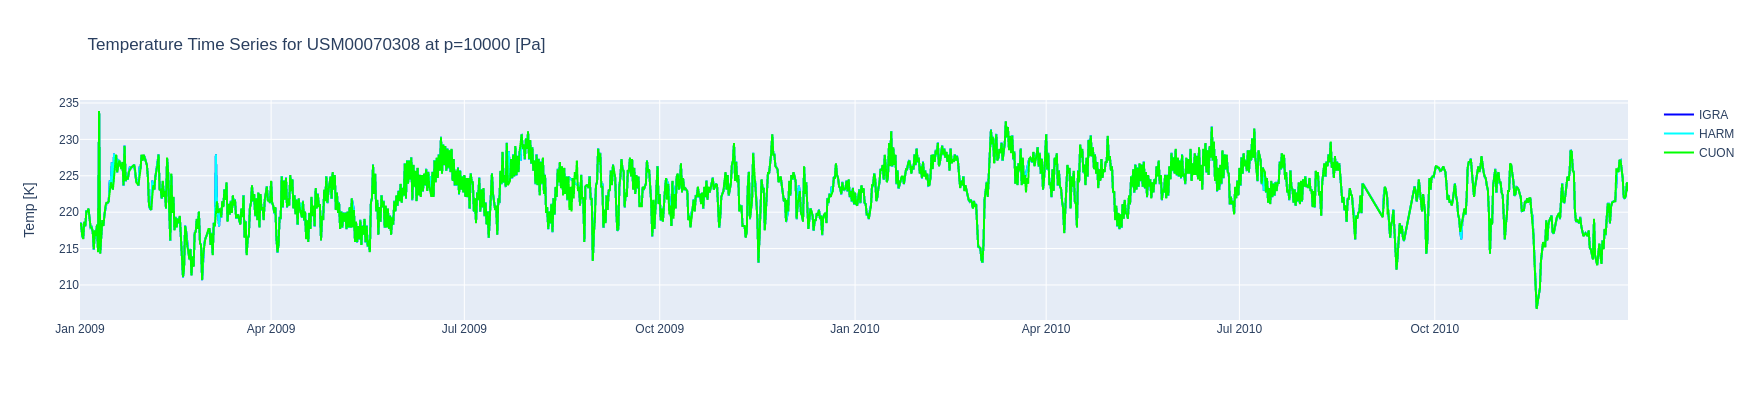

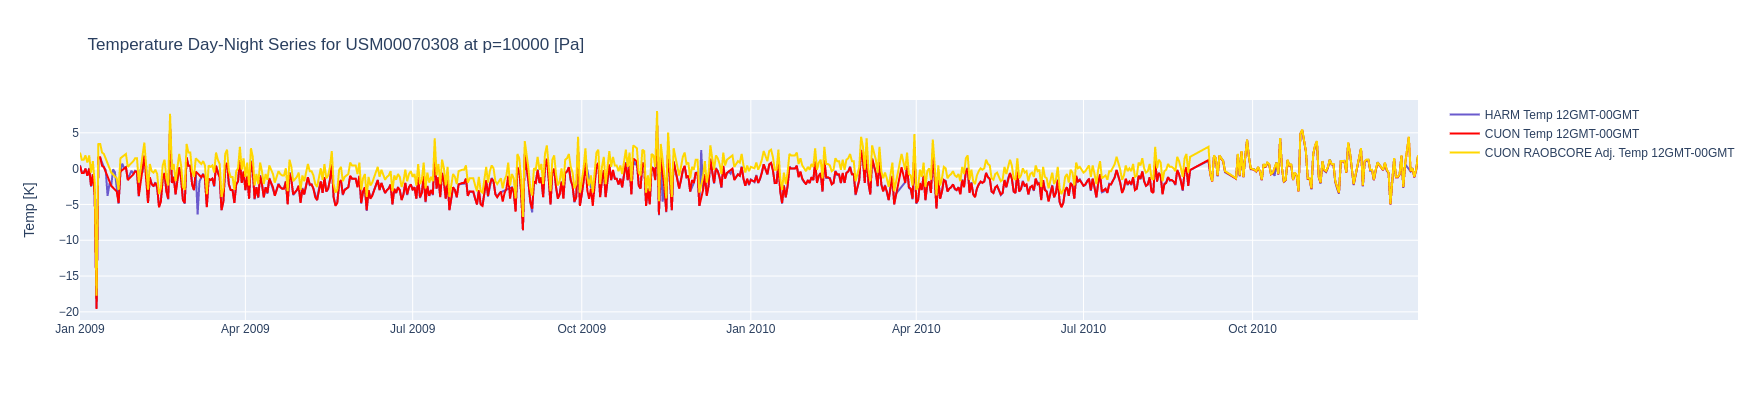

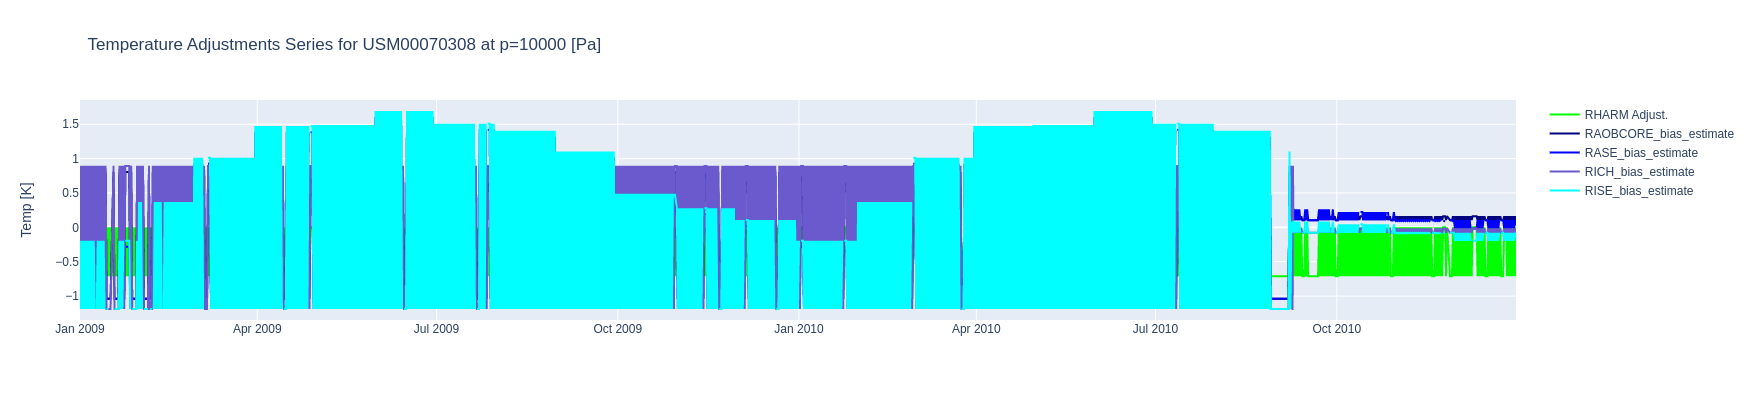

In [58]:
station, p = 'USM00070308' , 10000 
f,g = make_timeseries(station, p)
f.show()
g.show()
f,g = make_timeseries(station, p, source='csv', what='adj')
f.show()
#g.show()

![pic](70316.png)

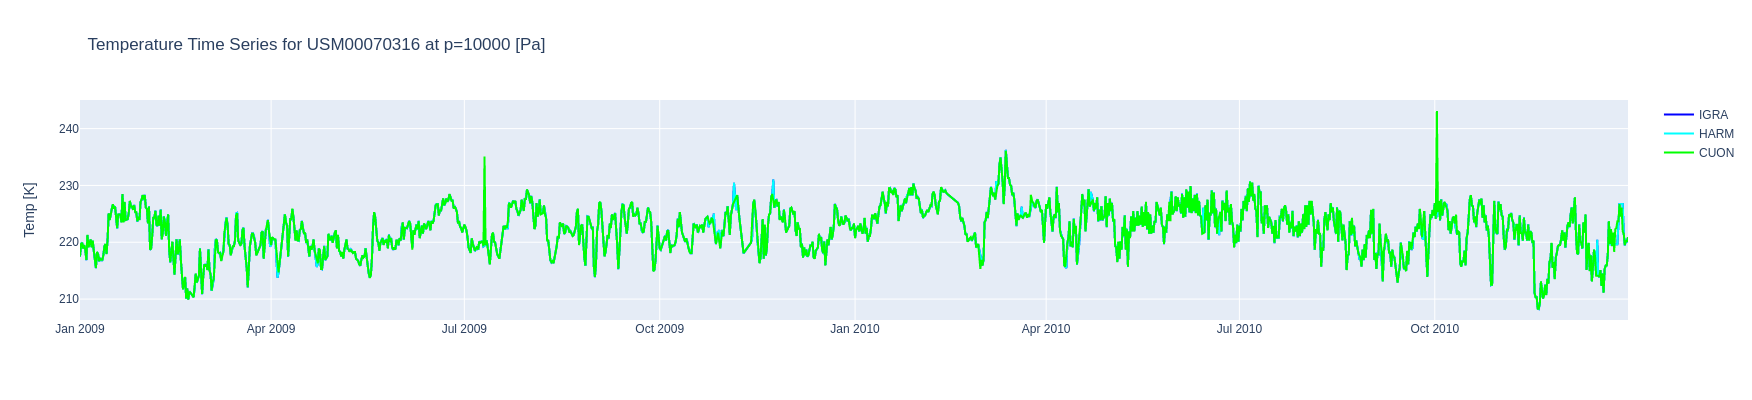

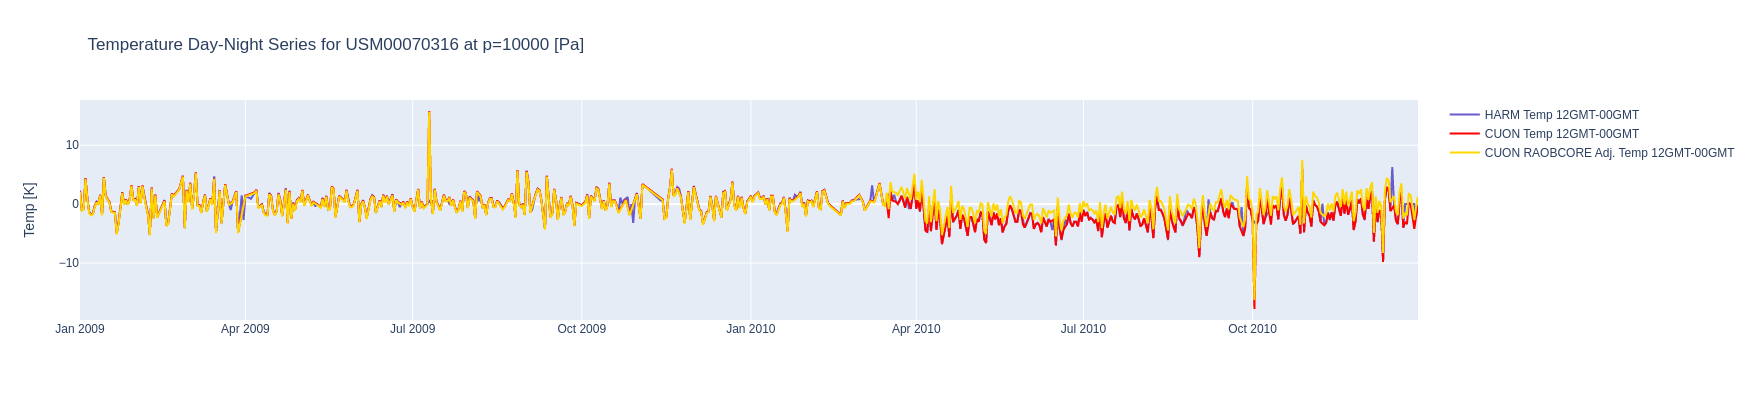

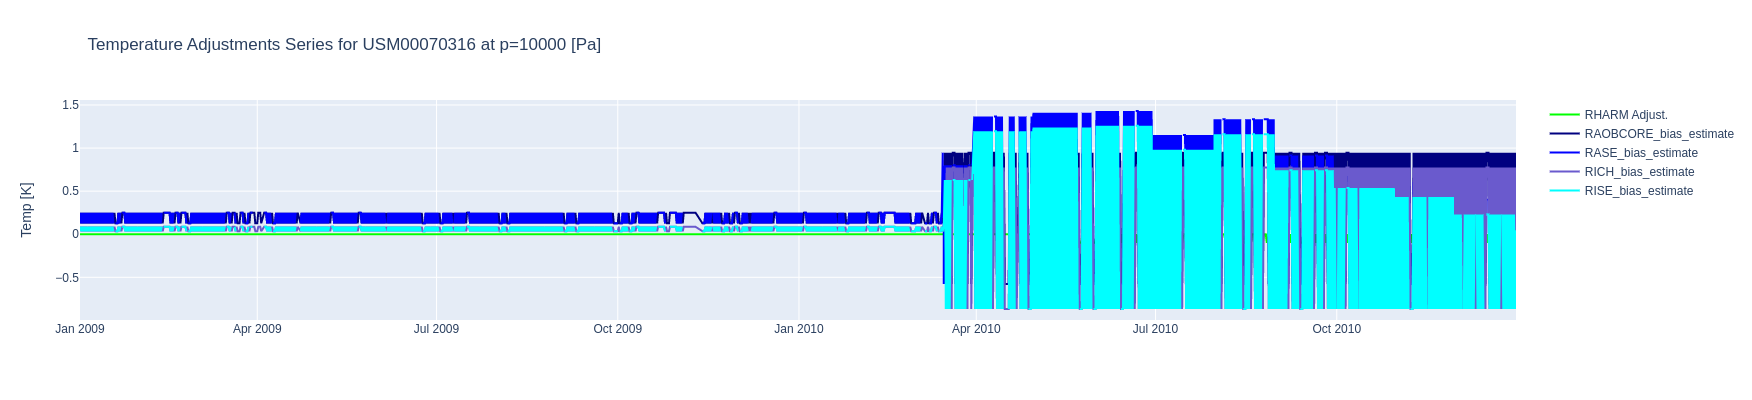

In [59]:
station, p = 'USM00070316' , 10000 
f,g = make_timeseries(station, p)
f.show()
g.show()
f,g = make_timeseries(station, p, what='ad')
f.show()
#g.show()

![pic](70350.png)

In [ ]:
station, p = 'USM00070350' , 10000 
f,g = make_timeseries(station, p)
f.show()
g.show()
f,g = make_timeseries(station, p, what='ad')
f.show()
#g.show()

![pic](91408.png)

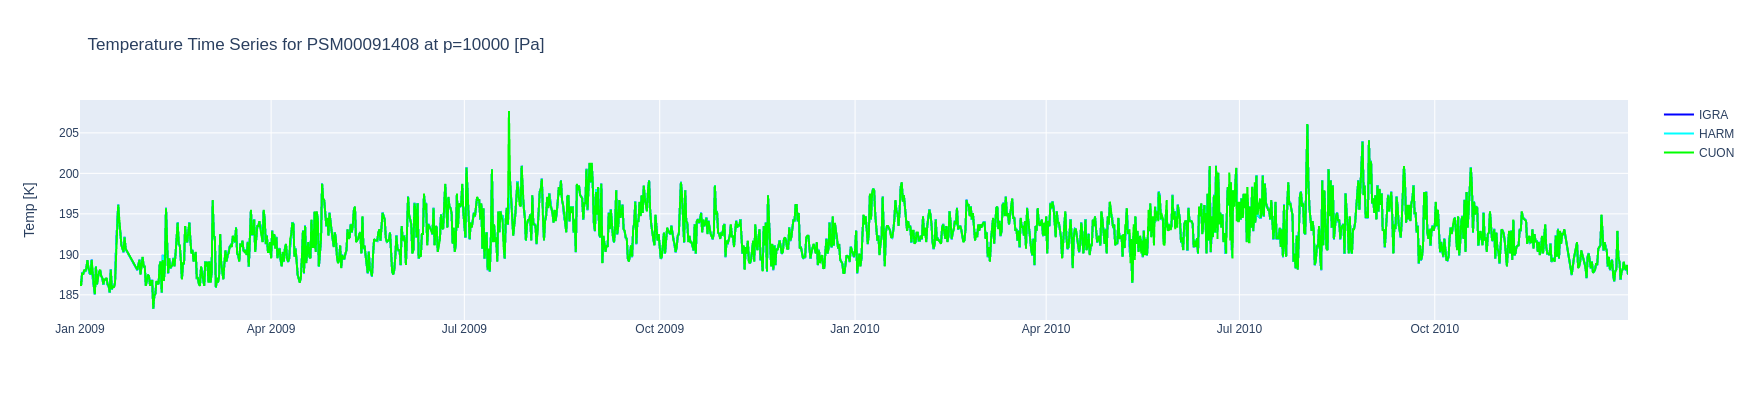

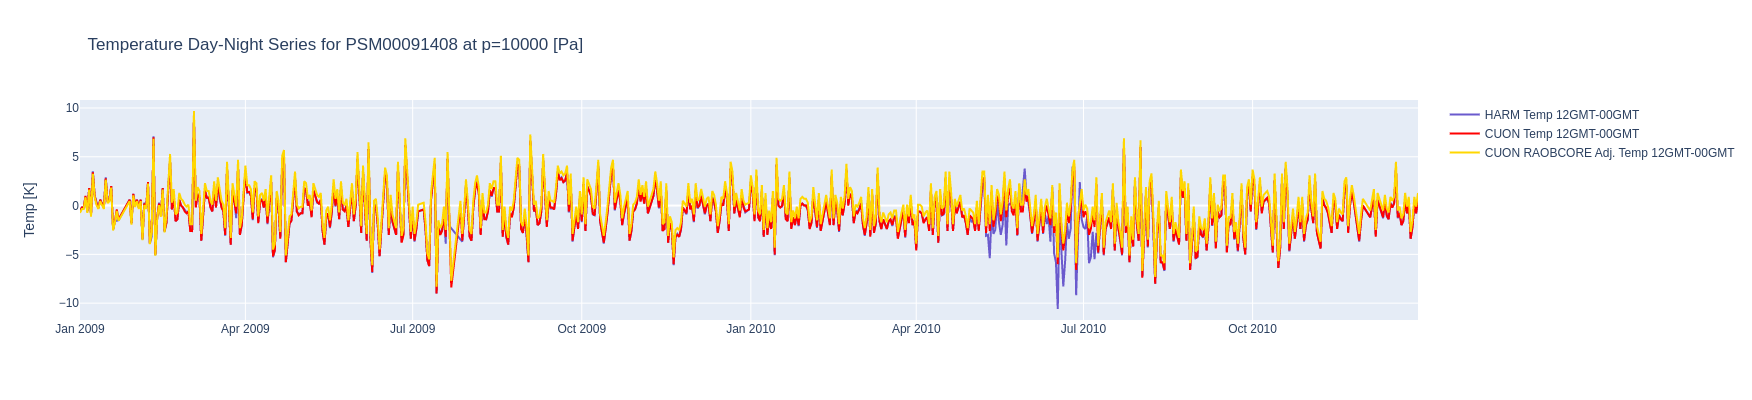

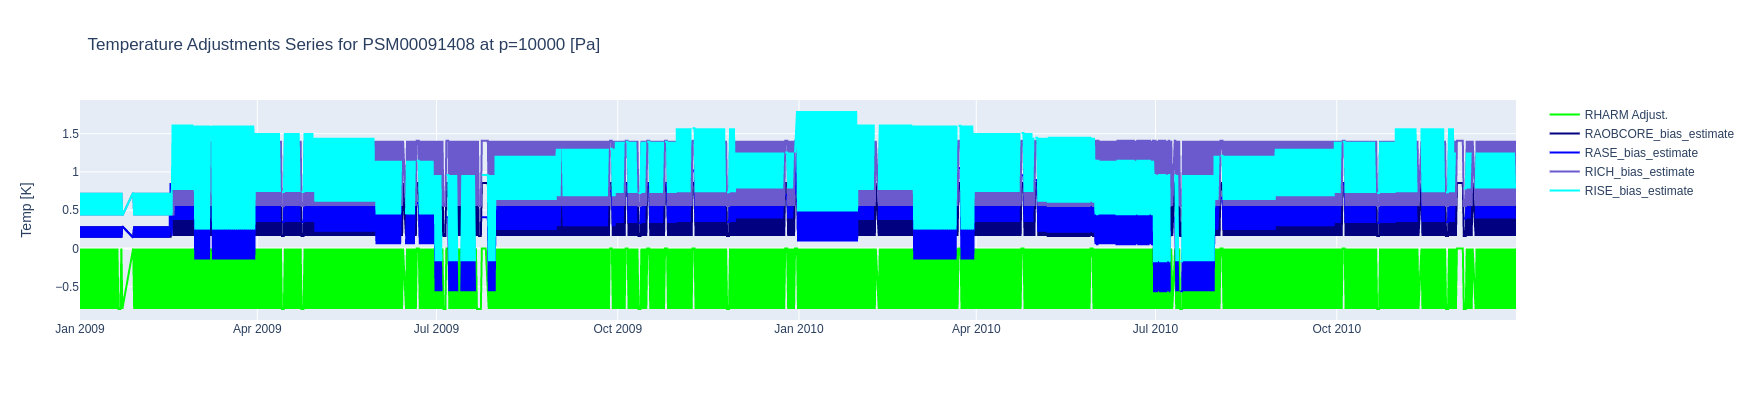

In [60]:
station, p = 'PSM00091408' , 10000 
f,g = make_timeseries(station, p)
f.show()
g.show()
f,g = make_timeseries(station, p, what='ad')
f.show()
#g.show()